In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

# Problem 1

In [2]:
#Read the data 
df1 = pd.read_csv('Sparkling.csv')

In [3]:
df1.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
#Check data types
df1.dtypes

YearMonth    object
Sparkling     int64
dtype: object

In [5]:
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'])

In [6]:
df1.head()

,YearMonth,Sparkling
0,1980-01-01,1686
1,1980-02-01,1591
2,1980-03-01,2304
3,1980-04-01,1712
4,1980-05-01,1471


In [7]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [8]:
df1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


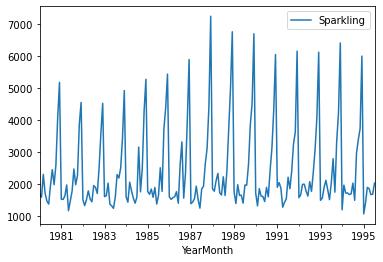

In [9]:
#Plot the time series
df1.plot()
plt.show()

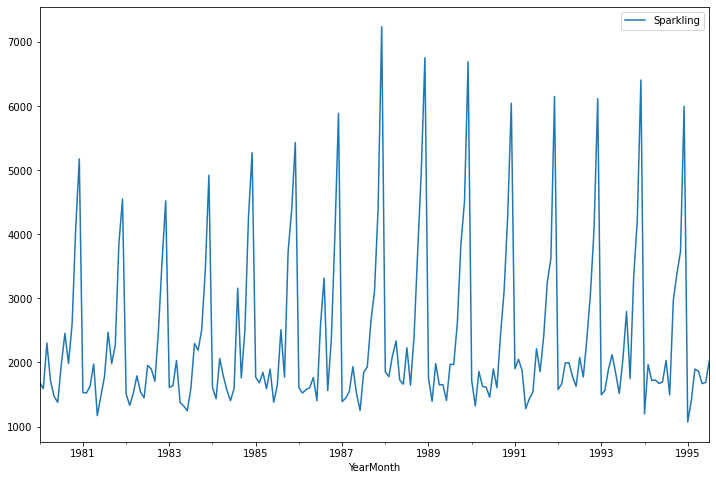

In [10]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

In [11]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

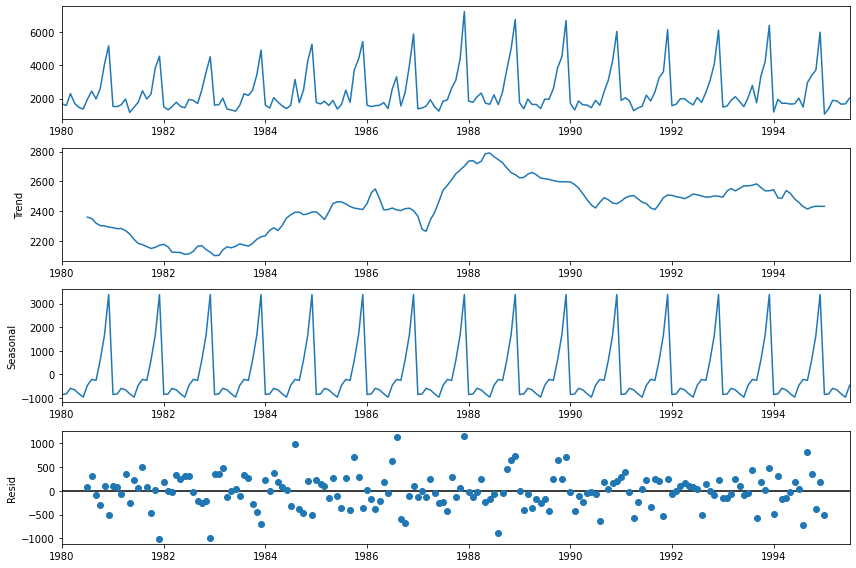

In [12]:
df1_add_decompose.plot()
plt.show()

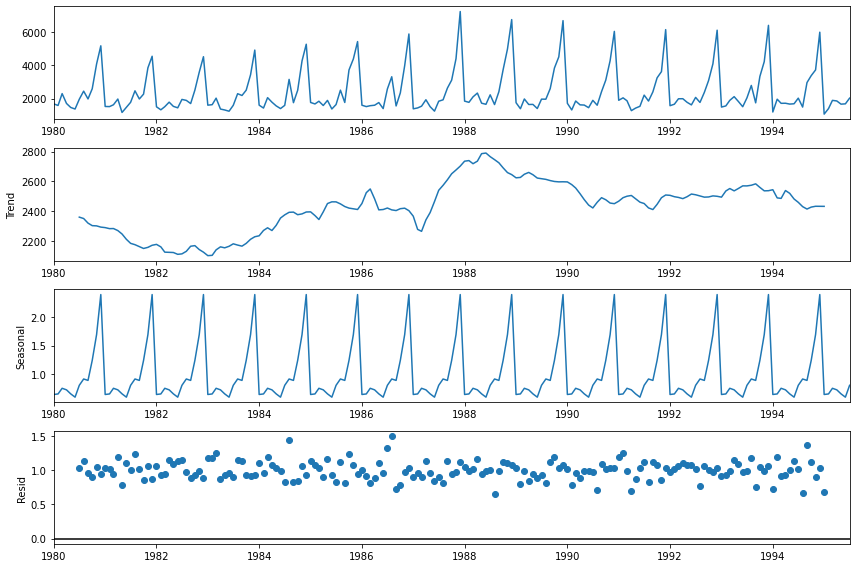

In [13]:
##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative")
df1_mul_decompose.plot()
plt.show()

In [14]:
#Let's try to do log transformation
df1_log = df1.copy()

In [15]:
df1_log['Sparkling'] = np.log(df1)

In [16]:
df1_log.Sparkling

YearMonth
1980-01-01    7.430114
1980-02-01    7.372118
1980-03-01    7.742402
1980-04-01    7.445418
1980-05-01    7.293698
                ...   
1995-03-01    7.548029
1995-04-01    7.529406
1995-05-01    7.420579
1995-06-01    7.431300
1995-07-01    7.616284
Name: Sparkling, Length: 187, dtype: float64

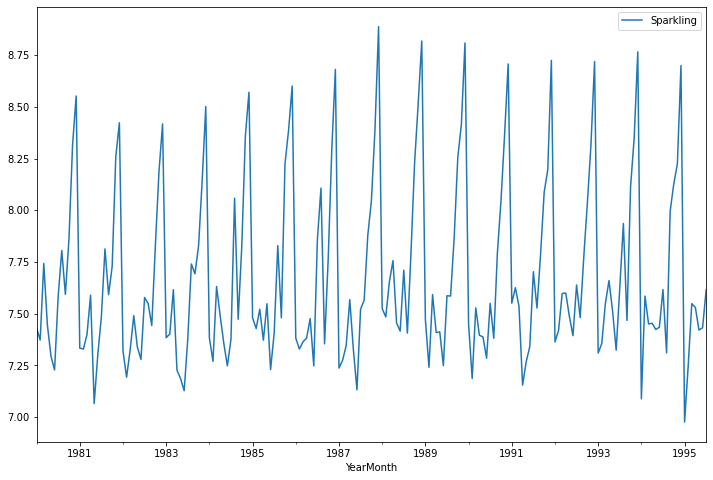

In [17]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

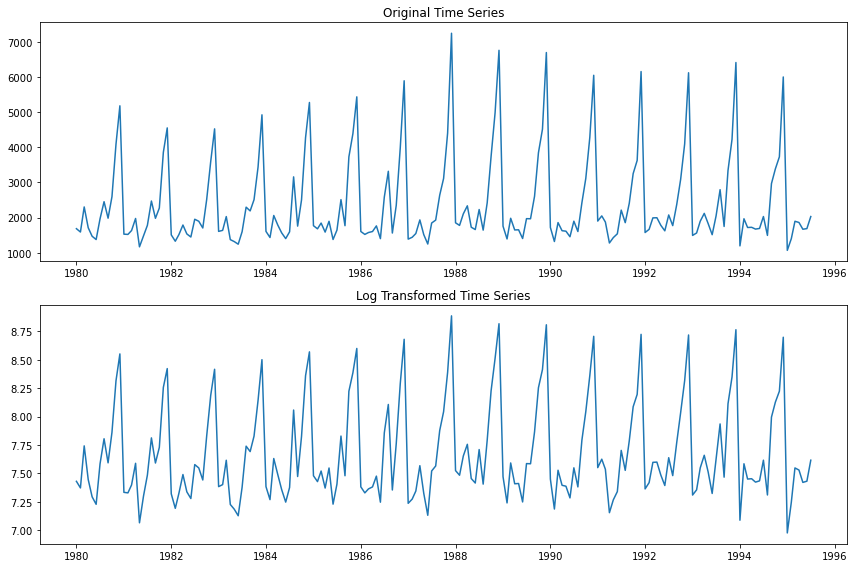

In [18]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()

# exponential Smoothing 

In [20]:
df = df1.copy()

In [21]:
train             = df[df.index<'1991'] 
test              = df[df.index>'1991']

In [22]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


Test Data


,Sparkling
YearMonth,
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540
1991-07-01,2214
1991-08-01,1857
1991-09-01,2408
1991-10-01,3252


# simple exponential Smoothing

In [23]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [24]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [25]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [26]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    2804.675124
1994-02-01    2804.675124
1994-03-01  

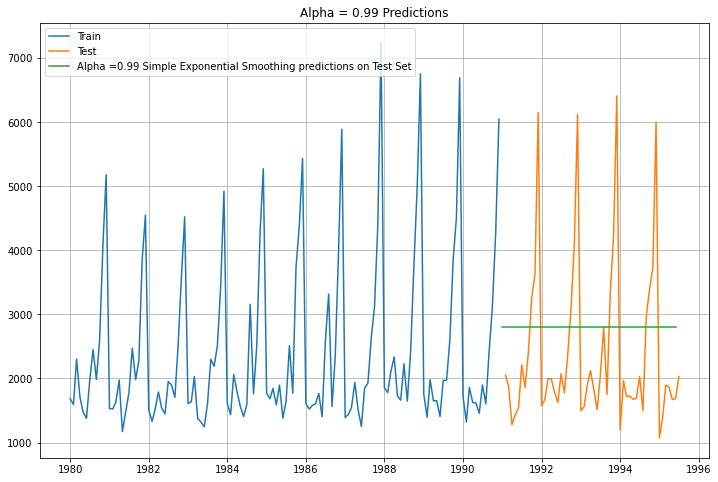

In [27]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [28]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [29]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1344.7416911131227
SES RMSE (calculated using statsmodels): 1344.7416911131224


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1344.741691


# Double Exponential Smoothing

In [31]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [32]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    8075.532356
1994-02-01    8149.804559
1994-03-01  

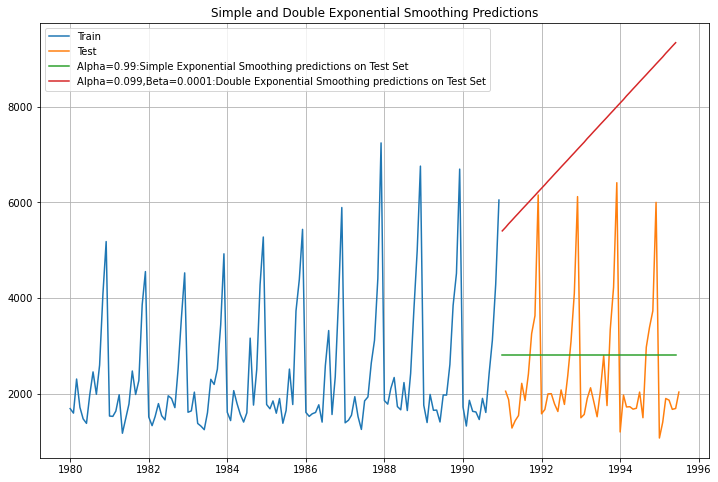

In [33]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [34]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 5249.117438874883


In [35]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1344.741691
"Alpha=1,Beta=0.0189:DES",5249.117439


In [36]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [37]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    1467.683944
1994-02-01    1181.806206
1994-03-01  

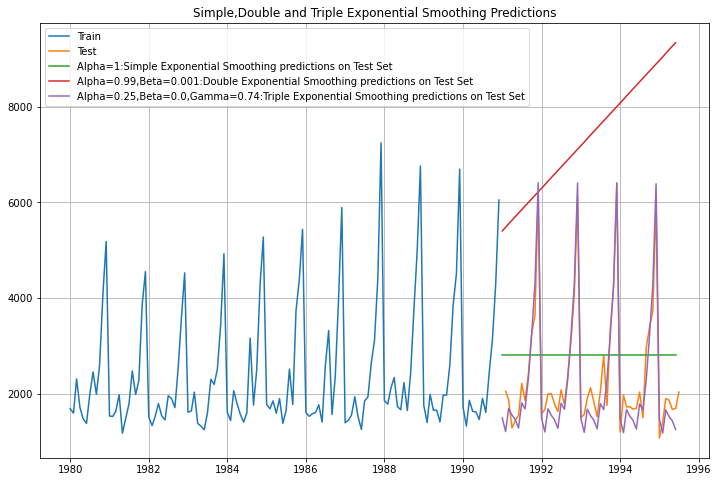

In [38]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [39]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 1576.0365787473954


In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1344.741691
"Alpha=1,Beta=0.0189:DES",5249.117439
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1576.036579


# ETS

In [42]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11133818361298699, 'smoothing_trend': 0.049505131019509915, 'smoothing_seasonal': 0.3620795793580111, 'damping_trend': nan, 'initial_level': 2356.4967888704355, 'initial_trend': -10.187944726007238, 'initial_seasons': array([0.71296382, 0.68242226, 0.90755008, 0.80515228, 0.65597218,
       0.65414505, 0.88617935, 1.13345121, 0.92046306, 1.21337874,
       1.87340336, 2.37811768]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [43]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    1439.706189
1994-02-01    1229.791202
1994-03-01  

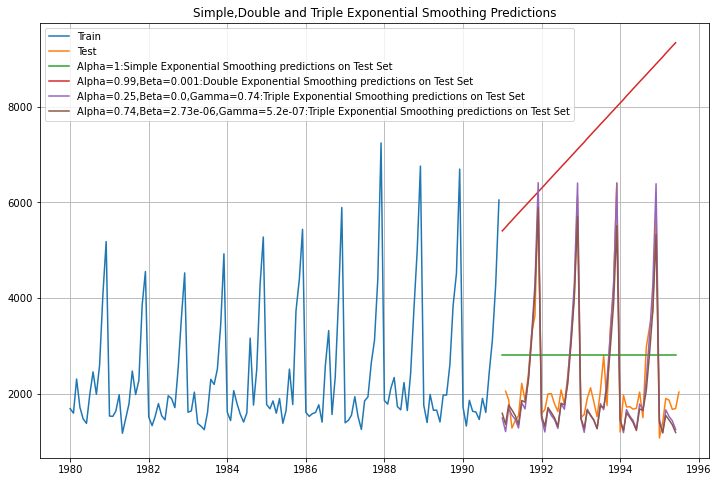

In [44]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [45]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 1443.5648454226289


In [46]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",1344.741691
"Alpha=1,Beta=0.0189:DES",5249.117439
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1576.036579
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1443.564845


# seasonal 

In [47]:
from statsmodels.tsa.stattools import adfuller

In [48]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932417
Number of lags used 12


In [49]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


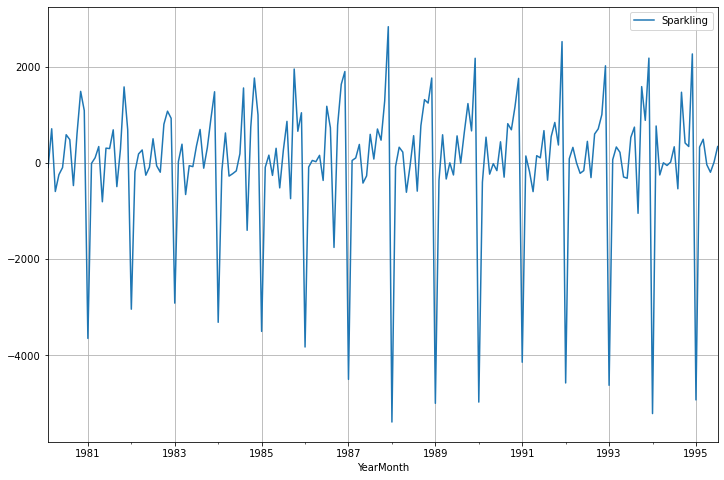

In [50]:
df.diff().dropna().plot(grid=True);

# ACF & PACF

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

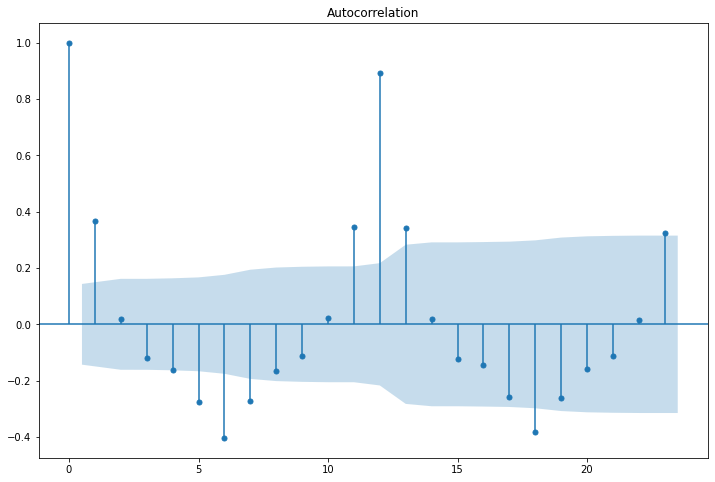

In [52]:
plot_acf(df,alpha=0.05);

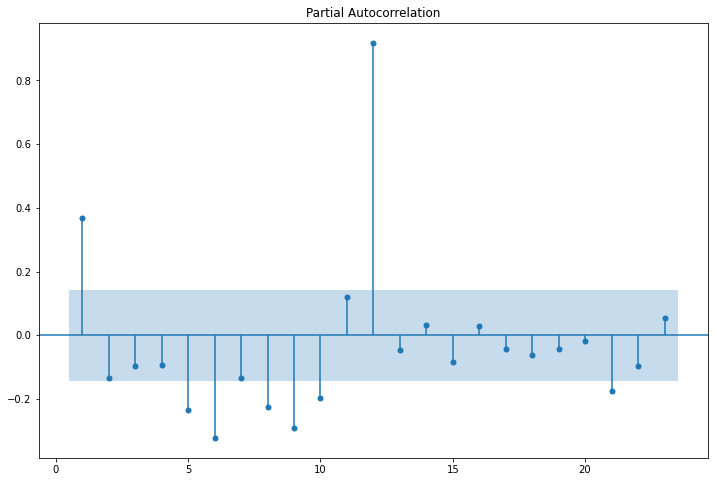

In [53]:
plot_pacf(df,zero=False,alpha=0.05);

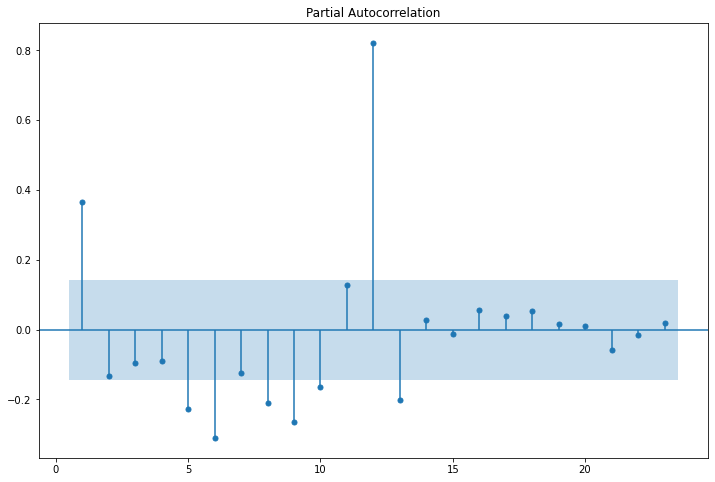

In [54]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [55]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [56]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [57]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Last few rows of Training Data


,Sparkling
YearMonth,
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047
1991-01-01,1902


First few rows of Test Data


,Sparkling
YearMonth,
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432
1991-06-01,1540


Last few rows of Test Data


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


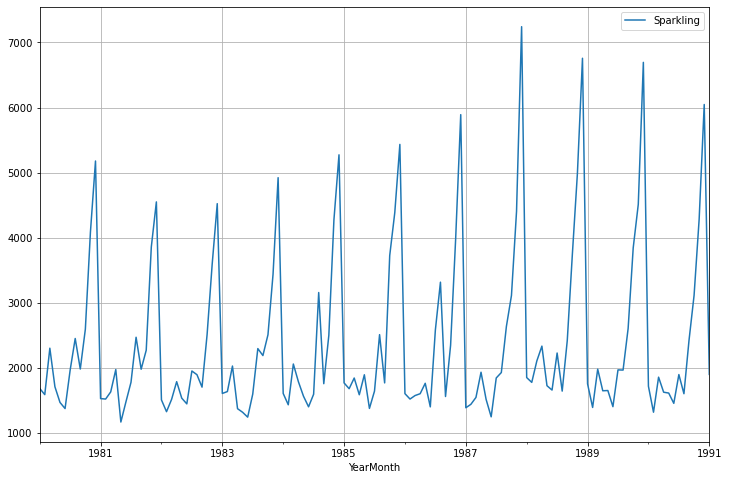

In [58]:
train.plot(grid=True);

In [59]:
print(train.shape)
print(test.shape)

(133, 1)
(54, 1)


In [60]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.106
DF test p-value is 0.5426117156065364
Number of lags used 12


In [61]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.132
DF test p-value is 3.541590788854345e-11
Number of lags used 11


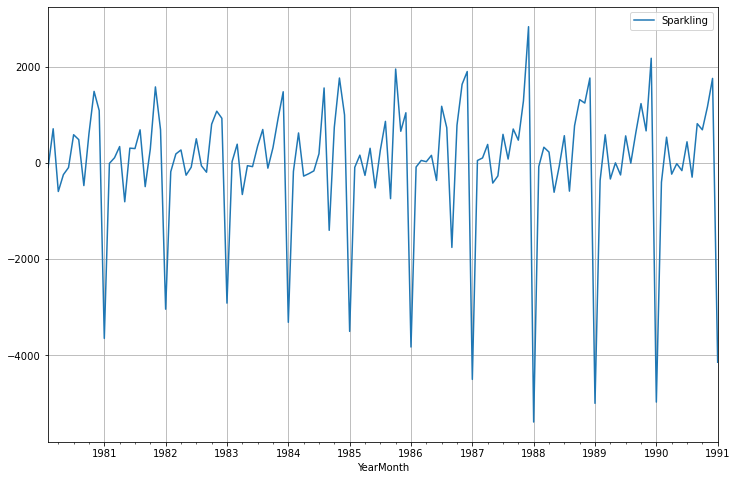

In [62]:
train.diff().dropna().plot(grid=True);

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1980-01-01 to 1991-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  133 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


# ARIMA --> AIC

In [64]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [65]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [66]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2292.766395774394
ARIMA(0, 1, 1) - AIC:2276.3405559130733
ARIMA(0, 1, 2) - AIC:2252.7020153380863
ARIMA(0, 1, 3) - AIC:2253.2672132759317
ARIMA(1, 1, 0) - AIC:2290.700315050188


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 1) - AIC:2254.7872120771876
ARIMA(1, 1, 2) - AIC:2253.7280893125953


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 3) - AIC:2254.8117840378454
ARIMA(2, 1, 0) - AIC:2283.400213742256
ARIMA(2, 1, 1) - AIC:2252.637699716449
ARIMA(2, 1, 2) - AIC:2233.915266898892


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:2250.8492131989715
ARIMA(3, 1, 0) - AIC:2279.919503413886
ARIMA(3, 1, 1) - AIC:2254.29336333448


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 2) - AIC:2249.463732435375
ARIMA(3, 1, 3) - AIC:2240.309658802761


In [67]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
10,"(2, 1, 2)",2233.915267
15,"(3, 1, 3)",2240.309659
14,"(3, 1, 2)",2249.463732
11,"(2, 1, 3)",2250.849213
9,"(2, 1, 1)",2252.637700


In [68]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  133
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1111.958
Date:                Fri, 18 Mar 2022   AIC                           2233.915
Time:                        20:04:08   BIC                           2248.329
Sample:                    01-01-1980   HQIC                          2239.772
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2780      0.047     27.373      0.000       1.186       1.370
ar.L2         -0.5238      0.069     -7.574      0.000      -0.659      -0.388
ma.L1         -1.9916      0.106    -18.717      0.0

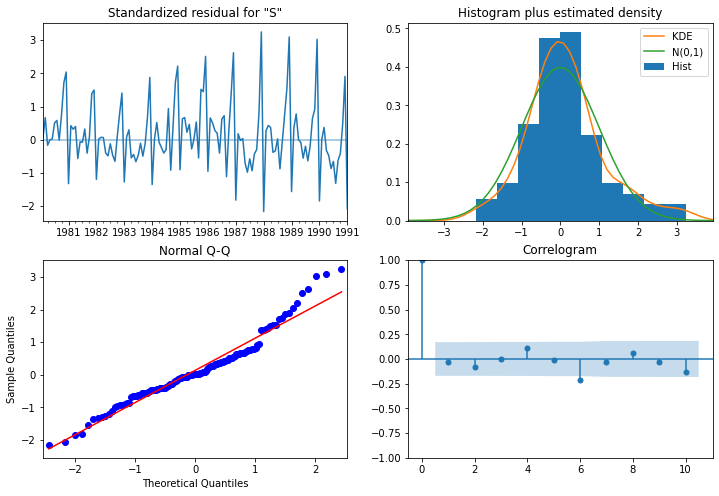

In [69]:
results_auto_ARIMA.plot_diagnostics();

# predict on Test set

In [70]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [71]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1298.6785226096151 
MAPE: 46.53733000569604


In [72]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678523,46.53733


# ARIMA Training model

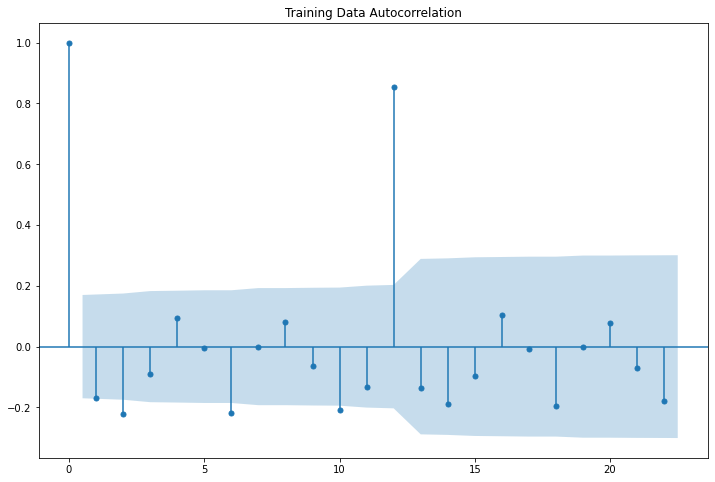

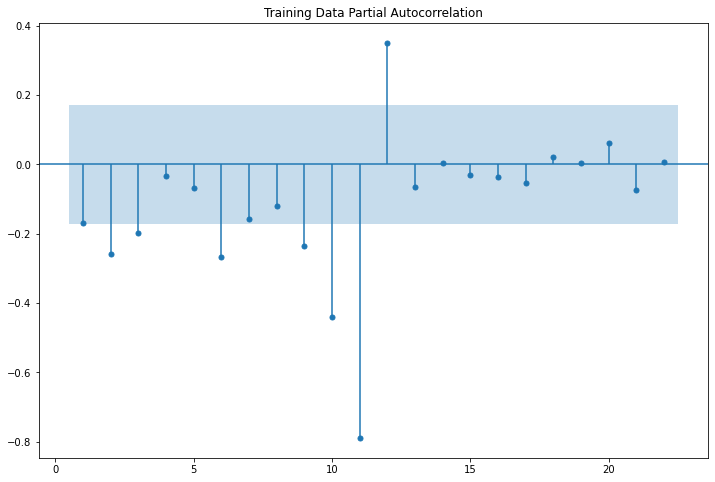

In [74]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [75]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(4,1,4))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmod

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  133
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1106.515
Date:                Fri, 18 Mar 2022   AIC                           2231.031
Time:                        20:05:52   BIC                           2256.976
Sample:                    01-01-1980   HQIC                          2241.574
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4649      0.104     -4.469      0.000      -0.669      -0.261
ar.L2         -0.4667      0.070     -6.679      0.000      -0.604      -0.330
ar.L3         -0.4667      0.087     -5.336      0.0

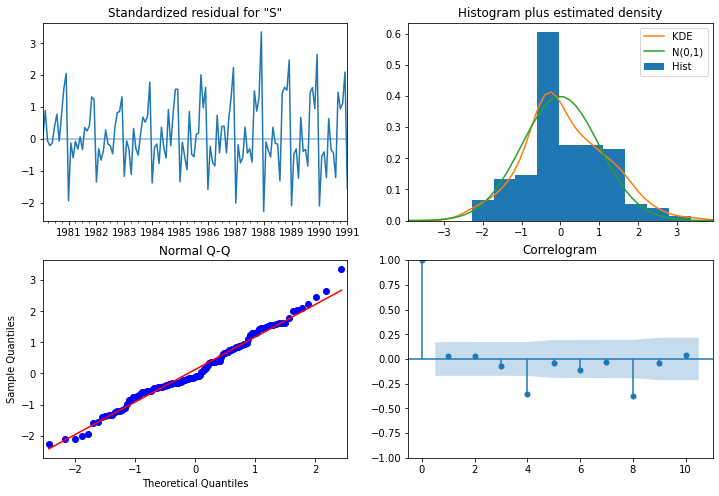

In [76]:
results_manual_ARIMA.plot_diagnostics();

# predict Test

In [77]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [78]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1182.7532630387948 
MAPE: 36.79740703047276


In [79]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678523,46.537330
"ARIMA(3,1,3)",1182.753263,36.797407


# SARIMA

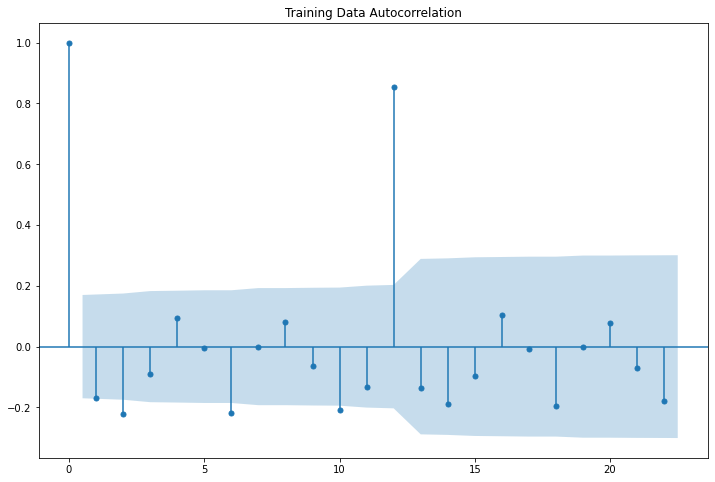

In [80]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [81]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [82]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [83]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2276.40438968189
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2177.258796947723
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1975.4080224215115
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1882.3068614682572
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2189.1670399625896
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2097.245345871656
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1943.6309086648114
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1818.5784454969087
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1854.8097940366943
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1856.606689488849
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1829.1959228359763
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1741.063563719093
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1764.2340472076612
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1766.1709466238412
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1757.2546197664967
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1742.9892731806358
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2251.8815378143836
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2138.1037781661284
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC

SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1777.3791911240126
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1759.4004968137028
SARIMA(2, 1, 1)x(2, 0, 3, 6) - AIC:1676.9802083790178
SARIMA(2, 1, 1)x(3, 0, 0, 6) - AIC:1690.4060173653227
SARIMA(2, 1, 1)x(3, 0, 1, 6) - AIC:1687.9109206647558
SARIMA(2, 1, 1)x(3, 0, 2, 6) - AIC:1676.7647250378154
SARIMA(2, 1, 1)x(3, 0, 3, 6) - AIC:1678.607647093877
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:2187.551297273375
SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:2098.851685022336
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1900.794661171284
SARIMA(2, 1, 2)x(0, 0, 3, 6) - AIC:1814.9717882980517
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:2104.2216316421127
SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1971.5555763917466
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1851.6155068399748
SARIMA(2, 1, 2)x(1, 0, 3, 6) - AIC:1729.0364182475914
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1773.452496351256
SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1775.336927587165
SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1745.1287840702964
SARIMA(2, 1, 2)x(2, 0, 3, 6) - AIC

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:1725.2788977209932
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1773.6780871366927
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1777.1452145039043
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1730.294872378889
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:1644.6698567073147
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC:1689.7305671702768
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC:1688.8175759245748
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC:1678.9162715057855
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC:1655.0156062670937
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC:2230.469940342974
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC:2163.7778197352927
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC:1959.8977978927808
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC:1866.7900001240198
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:2124.079189330703
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:2043.0469719160105
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1923.9621824853816
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1797.7630186475947
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC:1780.6460124526257
SARIMA(3, 1, 0)x(2, 0, 1, 6) - 

In [84]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",1644.669857
251,"(3, 1, 3)","(2, 0, 3, 6)",1646.742780
59,"(0, 1, 3)","(2, 0, 3, 6)",1648.796116
63,"(0, 1, 3)","(3, 0, 3, 6)",1650.626012
123,"(1, 1, 3)","(2, 0, 3, 6)",1650.927330


In [85]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  133
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -815.352
Date:                           Fri, 18 Mar 2022   AIC                           1652.704
Time:                                   20:20:50   BIC                           1682.409
Sample:                               01-01-1980   HQIC                          1664.752
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2643      0.359      0.737      0.461      -0.439       0.967
ma.L1         -1.8426      0.431     -4.277

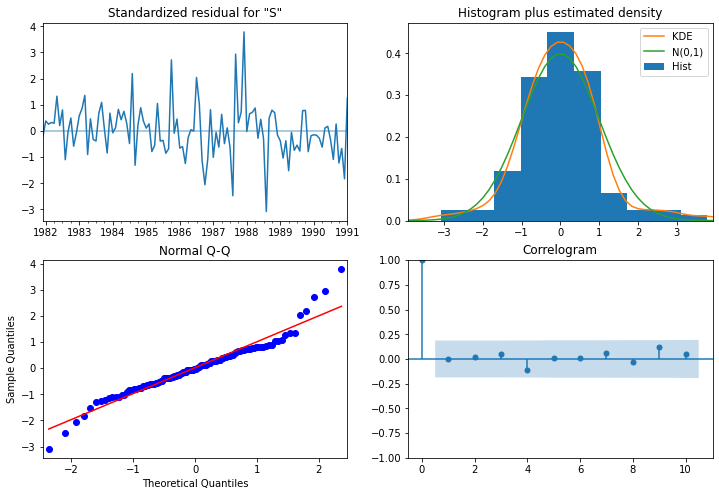

In [86]:
results_auto_SARIMA.plot_diagnostics();

# SARIMA TEST

In [87]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [88]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-02-01,1227.214159,393.330787,456.299983,1998.128336
1991-03-01,1644.294371,401.625833,857.122203,2431.466540
1991-04-01,1541.030421,401.722374,753.669036,2328.391807
1991-05-01,1290.991161,403.767479,499.621444,2082.360877
1991-06-01,1082.355095,407.357997,283.948093,1880.762098


In [89]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 686.5443754997043 
MAPE: 28.385087078089427


In [90]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678523,46.537330
"ARIMA(3,1,3)",1182.753263,36.797407
"SARIMA(1,1,3)(3,0,3,6)",686.544375,28.385087


# sarima ACF & PACF

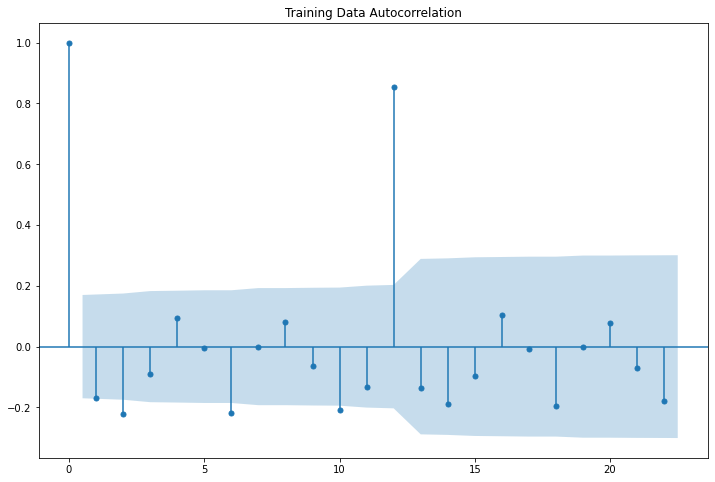

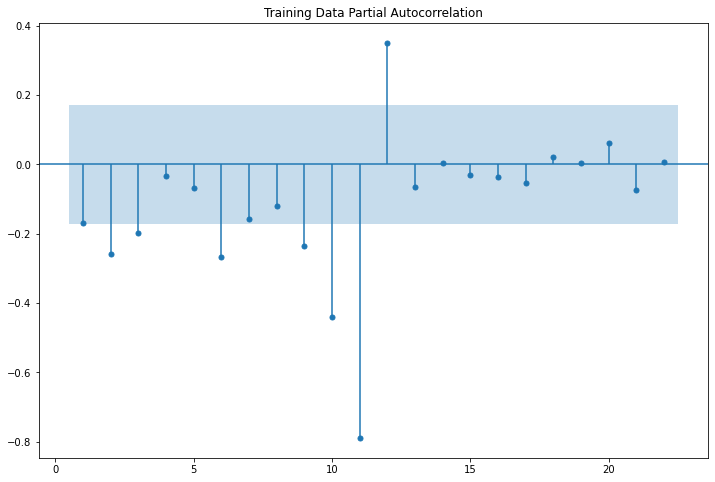

In [91]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [92]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  133
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -885.736
Date:                           Fri, 18 Mar 2022   AIC                           1791.472
Time:                                   20:21:06   BIC                           1818.477
Sample:                               01-01-1980   HQIC                          1802.425
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2283      0.085      2.681      0.007       0.061       0.395
ar.L2          0.7101      0.103      6.924

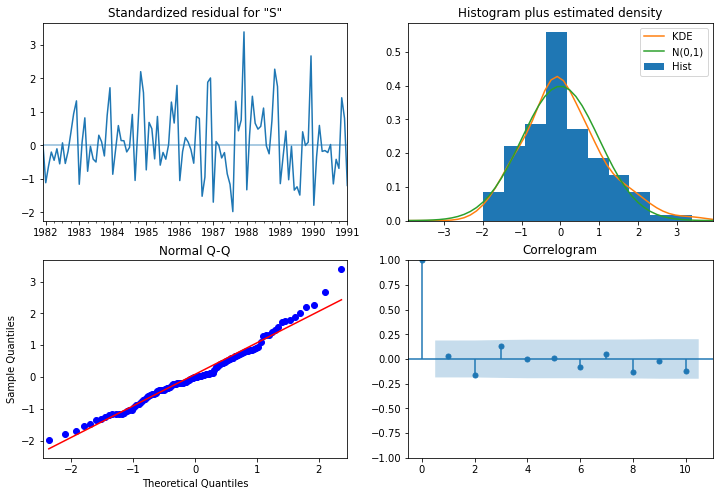

In [93]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

# Test SARIMA

In [94]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [95]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1187.9304670135293 
MAPE: 40.58831544595821


In [96]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678523,46.537330
"ARIMA(3,1,3)",1182.753263,36.797407
"SARIMA(1,1,3)(3,0,3,6)",686.544375,28.385087
"SARIMA(3,1,3)(0,0,3,6)",1187.930467,40.588315


# MOST OPTIMUM VALUES

In [97]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood               -1208.937
Date:                           Fri, 18 Mar 2022   AIC                           2439.873
Time:                                   20:21:30   BIC                           2473.972
Sample:                               01-01-1980   HQIC                          2453.716
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5919      0.222      2.662      0.008       0.156       1.028
ma.L1         -1.7762      0.459     -3.867

# PREDICT THE FUTURE VALUE

In [98]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [99]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1804.011936,374.944458,1069.134302,2538.889570
1995-09-01,2363.049111,380.873669,1616.550438,3109.547784
1995-10-01,3243.934160,380.971530,2497.243681,3990.624638
1995-11-01,4001.155575,381.070645,3254.270834,4748.040315
1995-12-01,6259.122251,381.542100,5511.313477,7006.931025


In [100]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 576.3037804853504


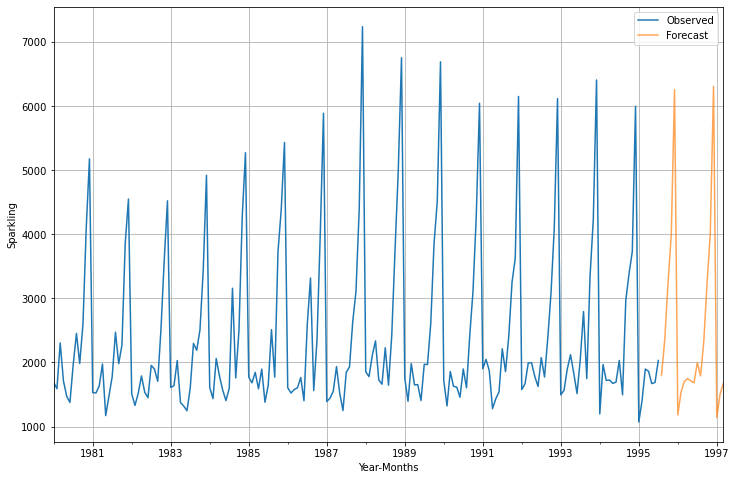

In [101]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

In [102]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1298.678523,46.537330
"ARIMA(3,1,3)",1182.753263,36.797407
"SARIMA(1,1,3)(3,0,3,6)",686.544375,28.385087
"SARIMA(3,1,3)(0,0,3,6)",1187.930467,40.588315


# Problem 2

In [103]:
#Read the data 
df1 = pd.read_csv('Rose.csv')

In [104]:
df1.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [118]:
#Check data types
df1.dtypes

YearMonth     object
Rose         float64
dtype: object

In [119]:
df1 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'])

In [120]:
#It is recommended that we make our time series reference as the index
df1 = pd.read_csv('Rose.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [121]:
df1.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [122]:
df1.isnull().sum()

Rose    2
dtype: int64

In [123]:
df1 = df1.dropna()

In [124]:
df1.isnull().sum()

Rose    0
dtype: int64

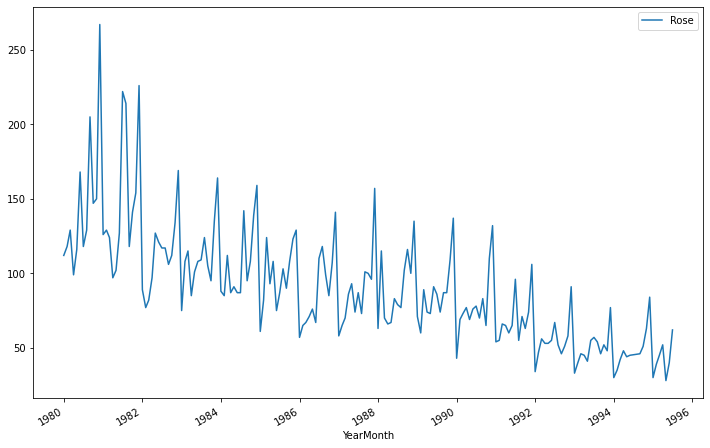

In [125]:
#Plot the time series
df1.plot()
plt.show()

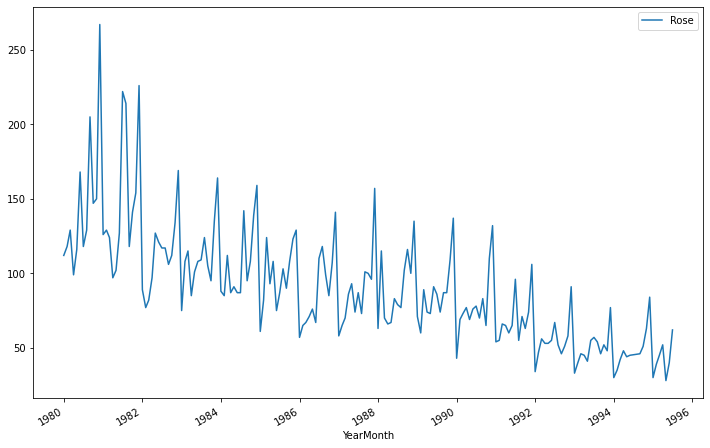

In [126]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df1.plot()
plt.show()

In [127]:
#Decompose the time series additively
df1_add_decompose = seasonal_decompose(df1, model = 'additive', period = 12)

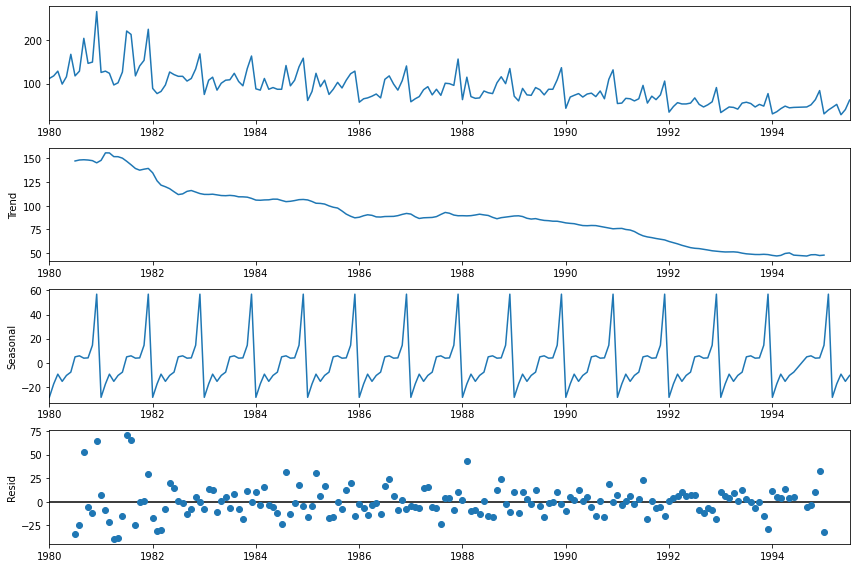

In [128]:
df1_add_decompose.plot()
plt.show()

##Decompose the time series multiplicatively
df1_mul_decompose = seasonal_decompose(df1, model = "multiplicative",freq = None)
df1_mul_decompose.plot()
plt.show()

In [129]:
#Let's try to do log transformation
df1_log = df1.copy()

In [130]:
df1_log['Rose'] = np.log(df1)

In [131]:
df1_log.Rose

YearMonth
1980-01-01    4.718499
1980-02-01    4.770685
1980-03-01    4.859812
1980-04-01    4.595120
1980-05-01    4.753590
                ...   
1995-03-01    3.806662
1995-04-01    3.951244
1995-05-01    3.332205
1995-06-01    3.688879
1995-07-01    4.127134
Name: Rose, Length: 185, dtype: float64

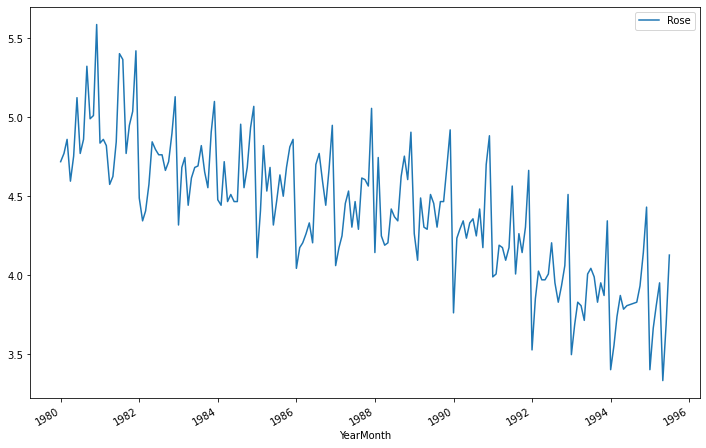

In [132]:
#Visualize the log transformed series
df1_log.plot()
plt.show()

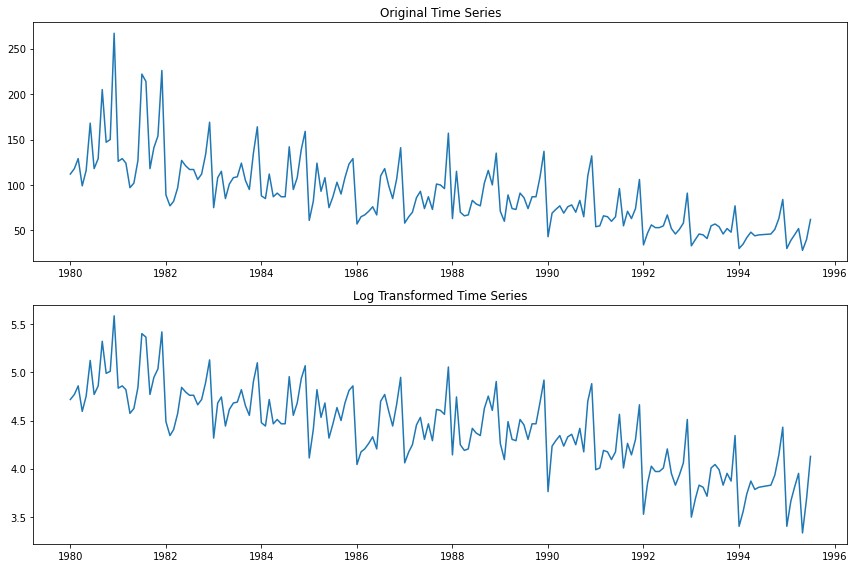

In [133]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df1)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df1_log)
plt.tight_layout()

In [134]:
df = df1.copy()

In [135]:
train             = df[df.index<'1991'] 
test              = df[df.index>'1991']

In [136]:
# Printing the AirPassengers Data
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
...,...
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0


Test Data


,Rose
YearMonth,
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0
1991-07-01,96.0
1991-08-01,55.0
1991-09-01,71.0
1991-10-01,63.0


In [137]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [138]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [139]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [140]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    87.104997
1991-02-01    87.104997
1991-03-01    87.104997
1991-04-01    87.104997
1991-05-01    87.104997
1991-06-01    87.104997
1991-07-01    87.104997
1991-08-01    87.104997
1991-09-01    87.104997
1991-10-01    87.104997
1991-11-01    87.104997
1991-12-01    87.104997
1992-01-01    87.104997
1992-02-01    87.104997
1992-03-01    87.104997
1992-04-01    87.104997
1992-05-01    87.104997
1992-06-01    87.104997
1992-07-01    87.104997
1992-08-01    87.104997
1992-09-01    87.104997
1992-10-01    87.104997
1992-11-01    87.104997
1992-12-01    87.104997
1993-01-01    87.104997
1993-02-01    87.104997
1993-03-01    87.104997
1993-04-01    87.104997
1993-05-01    87.104997
1993-06-01    87.104997
1993-07-01    87.104997
1993-08-01    87.104997
1993-09-01    87.104997
1993-10-01    87.104997
1993-11-01    87.104997
1993-12-01    87.104997
1994-01-01    87.104997
1994-02-01    87.104997
1994-03-01    87.104997
1994-04-01    87.104997
1994-05-01    87.104997
1994-06-01    87

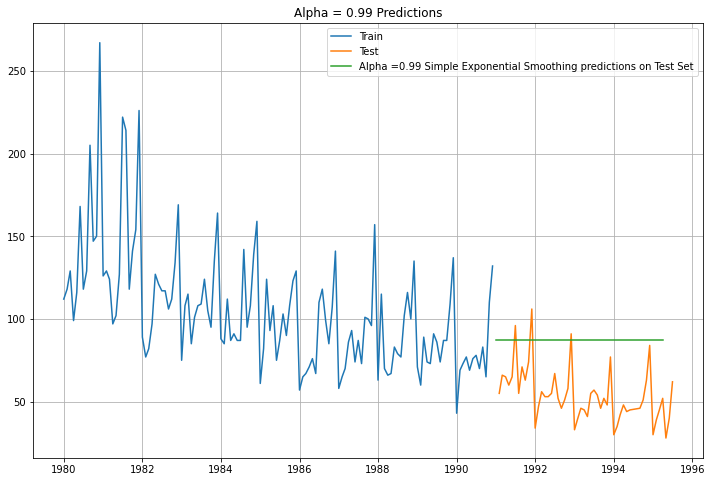

In [141]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [142]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [143]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.66638433297574
SES RMSE (calculated using statsmodels): 36.66638433297574


In [144]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.666384


In [145]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [146]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    72.063238
1991-02-01    71.568859
1991-03-01    71.074481
1991-04-01    70.580103
1991-05-01    70.085725
1991-06-01    69.591347
1991-07-01    69.096969
1991-08-01    68.602590
1991-09-01    68.108212
1991-10-01    67.613834
1991-11-01    67.119456
1991-12-01    66.625078
1992-01-01    66.130699
1992-02-01    65.636321
1992-03-01    65.141943
1992-04-01    64.647565
1992-05-01    64.153187
1992-06-01    63.658808
1992-07-01    63.164430
1992-08-01    62.670052
1992-09-01    62.175674
1992-10-01    61.681296
1992-11-01    61.186918
1992-12-01    60.692539
1993-01-01    60.198161
1993-02-01    59.703783
1993-03-01    59.209405
1993-04-01    58.715027
1993-05-01    58.220648
1993-06-01    57.726270
1993-07-01    57.231892
1993-08-01    56.737514
1993-09-01    56.243136
1993-10-01    55.748757
1993-11-01    55.254379
1993-12-01    54.760001
1994-01-01    54.265623
1994-02-01    53.771245
1994-03-01    53.276866
1994-04-01    52.782488
1994-05-01    52.288110
1994-06-01    51

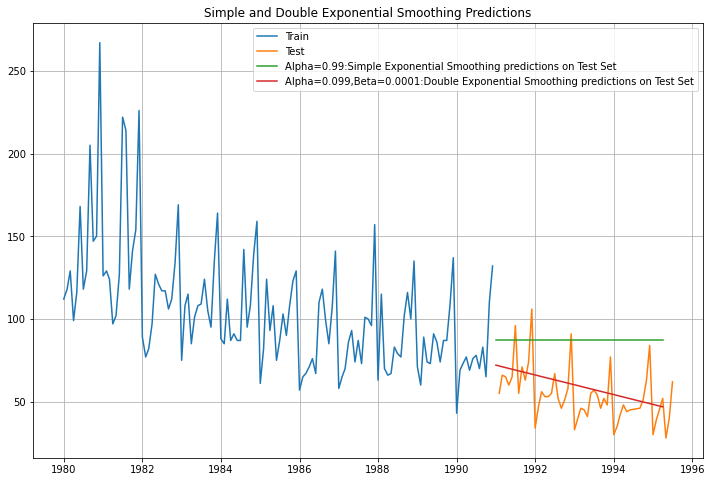

In [147]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [148]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.613676827323108


In [149]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.666384
"Alpha=1,Beta=0.0189:DES",15.613677


In [150]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [151]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01     42.684928
1991-02-01     54.564005
1991-03-01     61.995209
1991-04-01     50.852018
1991-05-01     59.034271
1991-06-01     63.850901
1991-07-01     73.190805
1991-08-01     78.724624
1991-09-01     74.276280
1991-10-01     71.895000
1991-11-01     89.444365
1991-12-01    131.042724
1992-01-01     36.119272
1992-02-01     47.998349
1992-03-01     55.429553
1992-04-01     44.286362
1992-05-01     52.468615
1992-06-01     57.285245
1992-07-01     66.625149
1992-08-01     72.158968
1992-09-01     67.710624
1992-10-01     65.329344
1992-11-01     82.878709
1992-12-01    124.477068
1993-01-01     29.553616
1993-02-01     41.432693
1993-03-01     48.863898
1993-04-01     37.720706
1993-05-01     45.902959
1993-06-01     50.719589
1993-07-01     60.059493
1993-08-01     65.593312
1993-09-01     61.144968
1993-10-01     58.763688
1993-11-01     76.313053
1993-12-01    117.911412
1994-01-01     22.987961
1994-02-01     34.867037
1994-03-01     42.298242
1994-04-01     31.155050


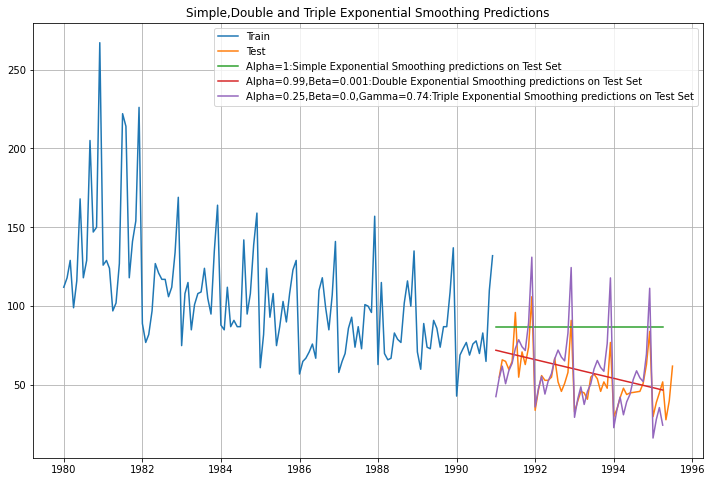

In [152]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [153]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 27.7884063813798


In [154]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.666384
"Alpha=1,Beta=0.0189:DES",15.613677
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",27.788406


In [155]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [156]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01     56.321655
1991-02-01     63.664690
1991-03-01     69.374024
1991-04-01     60.435528
1991-05-01     67.758341
1991-06-01     73.546478
1991-07-01     80.630117
1991-08-01     85.541323
1991-09-01     80.707713
1991-10-01     78.764555
1991-11-01     91.531230
1991-12-01    125.788433
1992-01-01     54.168902
1992-02-01     61.223492
1992-03-01     66.705377
1992-04-01     58.103246
1992-05-01     65.135026
1992-06-01     70.689855
1992-07-01     77.488188
1992-08-01     82.197159
1992-09-01     77.542202
1992-10-01     75.665128
1992-11-01     87.917577
1992-12-01    120.805914
1993-01-01     52.016149
1993-02-01     58.782294
1993-03-01     64.036730
1993-04-01     55.770964
1993-05-01     62.511711
1993-06-01     67.833232
1993-07-01     74.346259
1993-08-01     78.852995
1993-09-01     74.376691
1993-10-01     72.565700
1993-11-01     84.303925
1993-12-01    115.823395
1994-01-01     49.863396
1994-02-01     56.341097
1994-03-01     61.368082
1994-04-01     53.438682


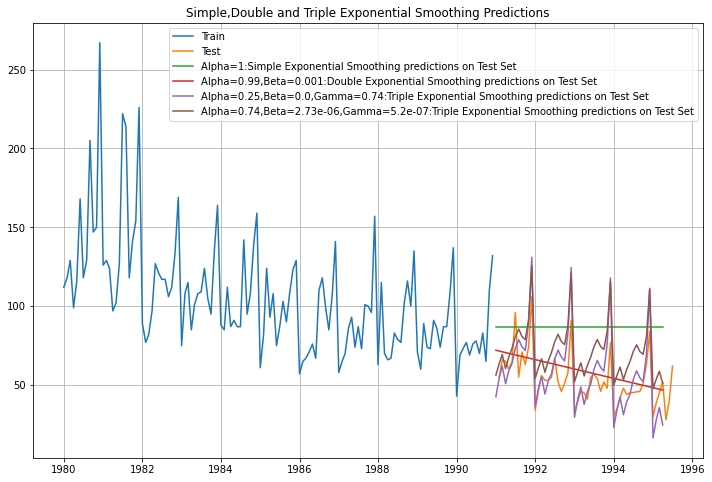

In [157]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [158]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 28.874168749050153


In [159]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.666384
"Alpha=1,Beta=0.0189:DES",15.613677
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",27.788406
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",28.874169


In [160]:
from statsmodels.tsa.stattools import adfuller

In [161]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.231
DF test p-value is 0.4724909144471119
Number of lags used 13


In [162]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.274
DF test p-value is 1.6668593336698215e-11
Number of lags used 12


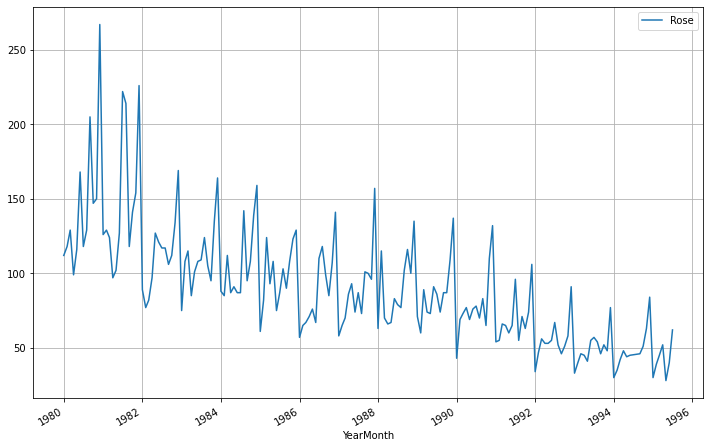

In [163]:
df.dropna().plot(grid=True);

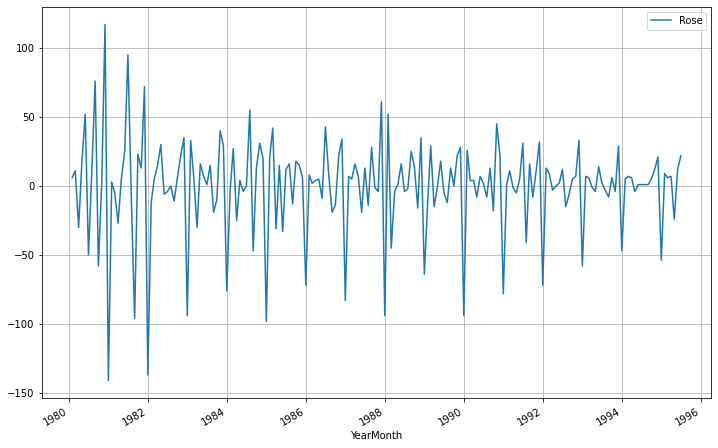

In [164]:
df.diff().dropna().plot(grid=True);

In [165]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

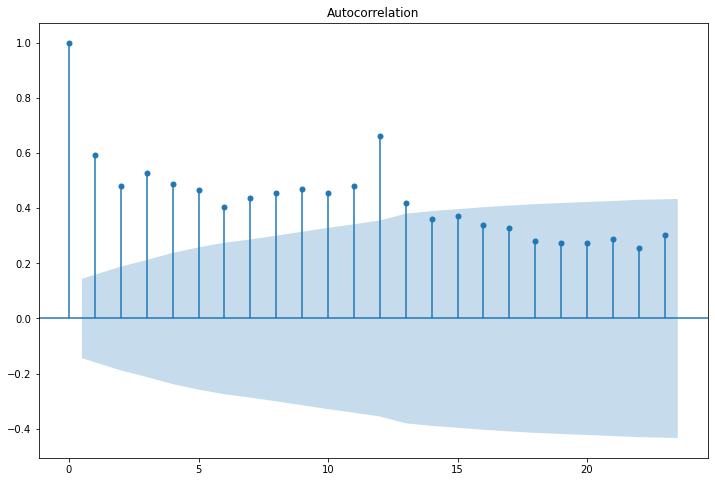

In [166]:
plot_acf(df,alpha=0.05);

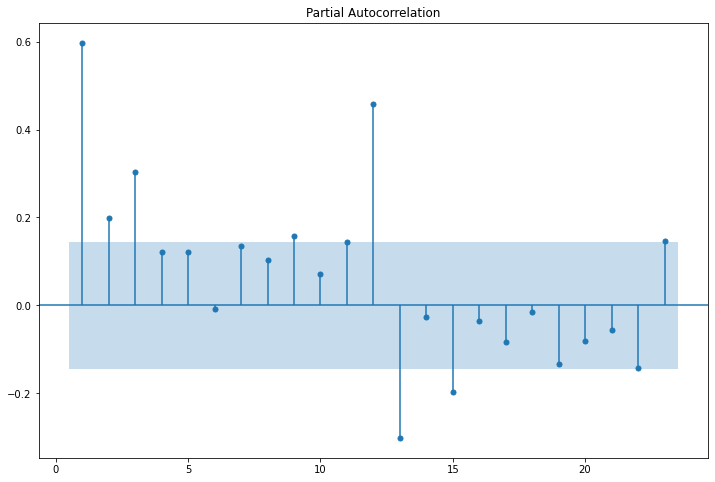

In [167]:
plot_pacf(df,zero=False,alpha=0.05);

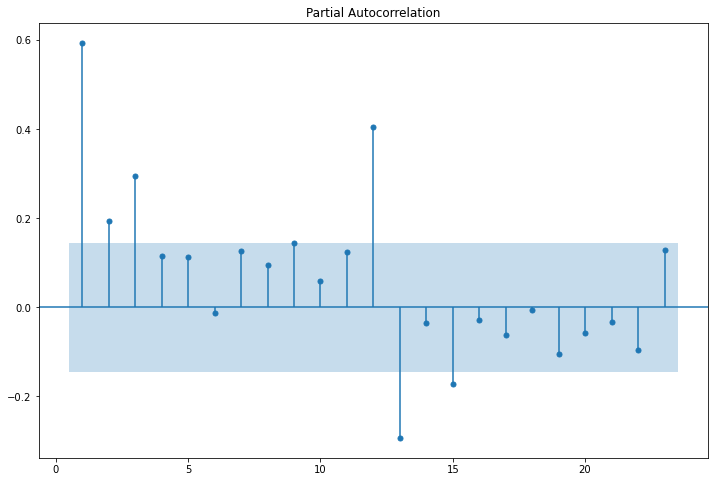

In [168]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');

In [169]:
train = df[df.index<='1991'] 
test = df[df.index>'1991']

In [170]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [171]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


Last few rows of Training Data


,Rose
YearMonth,
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0
1991-01-01,54.0


First few rows of Test Data


,Rose
YearMonth,
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0
1991-06-01,65.0


Last few rows of Test Data


,Rose
YearMonth,
1995-03-01,45.0
1995-04-01,52.0
1995-05-01,28.0
1995-06-01,40.0
1995-07-01,62.0


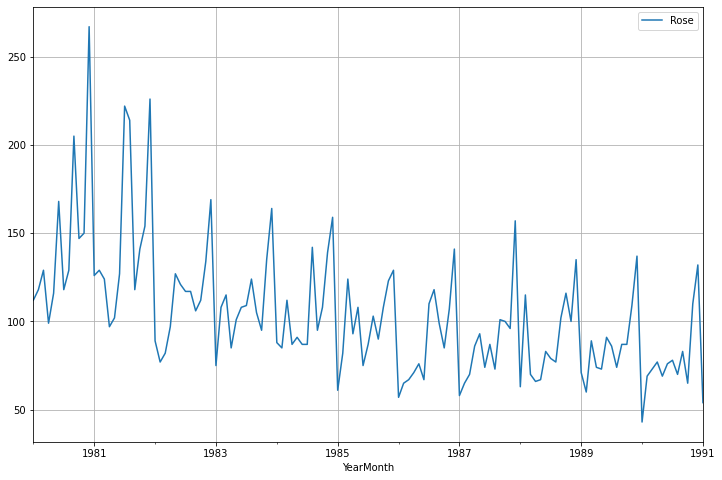

In [172]:
train.plot(grid=True);

In [173]:
print(train.shape)
print(test.shape)

(133, 1)
(52, 1)


In [174]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.710
DF test p-value is 0.7462869216865109
Number of lags used 13


In [175]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.860
DF test p-value is 2.925929599024369e-08
Number of lags used 12


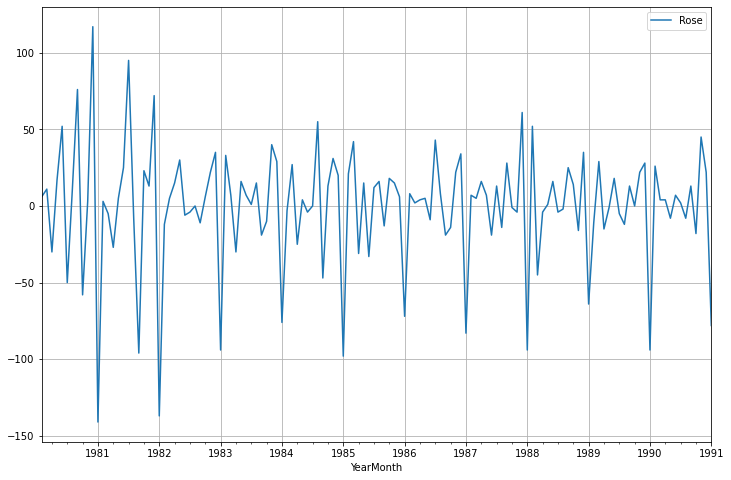

In [176]:
train.diff().dropna().plot(grid=True);

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1980-01-01 to 1991-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    133 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


In [178]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [179]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [180]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1346.2963442404784
ARIMA(0, 1, 1) - AIC:1292.1624687310393
ARIMA(0, 1, 2) - AIC:1290.1883766542624
ARIMA(0, 1, 3) - AIC:1290.6918140339094
ARIMA(1, 1, 0) - AIC:1330.064735604374
ARIMA(1, 1, 1) - AIC:1291.0406446227264
ARIMA(1, 1, 2) - AIC:1290.005220762423
ARIMA(1, 1, 3) - AIC:1291.9812146076647
ARIMA(2, 1, 0) - AIC:1309.636886850764
ARIMA(2, 1, 1) - AIC:1291.7627403701072
ARIMA(2, 1, 2) - AIC:1291.9768831554952


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1287.9749499582865
ARIMA(3, 1, 0) - AIC:1308.3556419351464
ARIMA(3, 1, 1) - AIC:1292.5994207276062


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1293.8340421544603
ARIMA(3, 1, 3) - AIC:1288.3526819393685


C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [181]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
11,"(2, 1, 3)",1287.974950
15,"(3, 1, 3)",1288.352682
6,"(1, 1, 2)",1290.005221
2,"(0, 1, 2)",1290.188377
3,"(0, 1, 3)",1290.691814


In [182]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  133
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -640.988
Date:                Tue, 15 Mar 2022   AIC                           1291.977
Time:                        06:45:55   BIC                           1306.391
Sample:                    01-01-1980   HQIC                          1297.834
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4634      0.446     -1.040      0.298      -1.337       0.410
ar.L2         -0.0186      0.160     -0.116      0.907      -0.332       0.295
ma.L1         -0.2568      0.436     -0.589      0.5

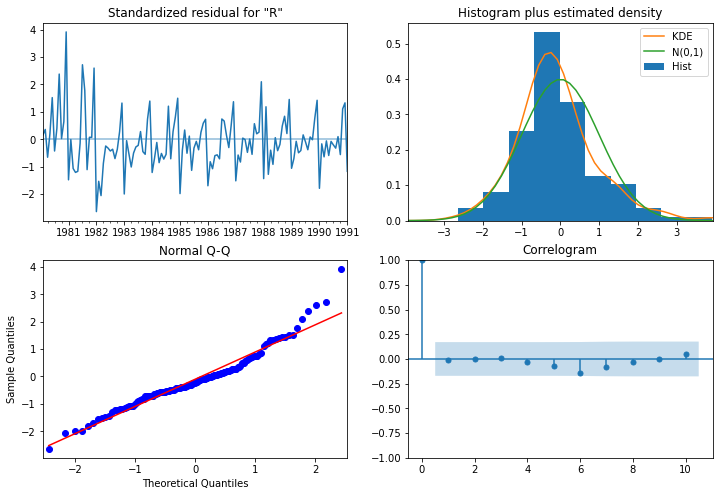

In [183]:
results_auto_ARIMA.plot_diagnostics();

In [184]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [185]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 33.28793327432198 
MAPE: 68.2848664976086


In [186]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.287933,68.284866


In [187]:
#ARIM

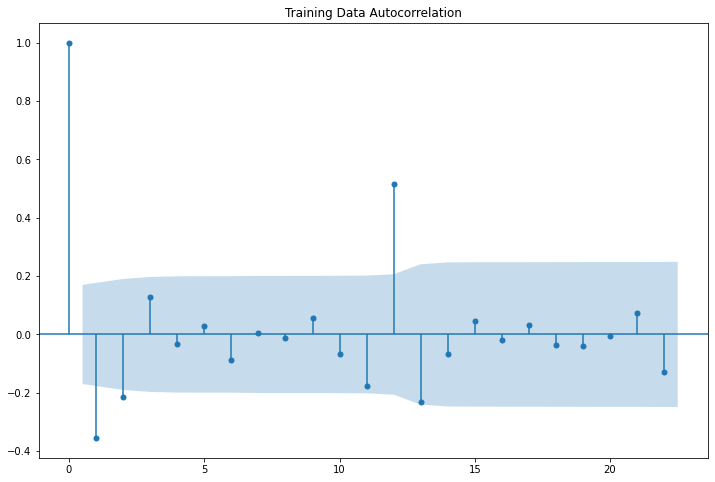

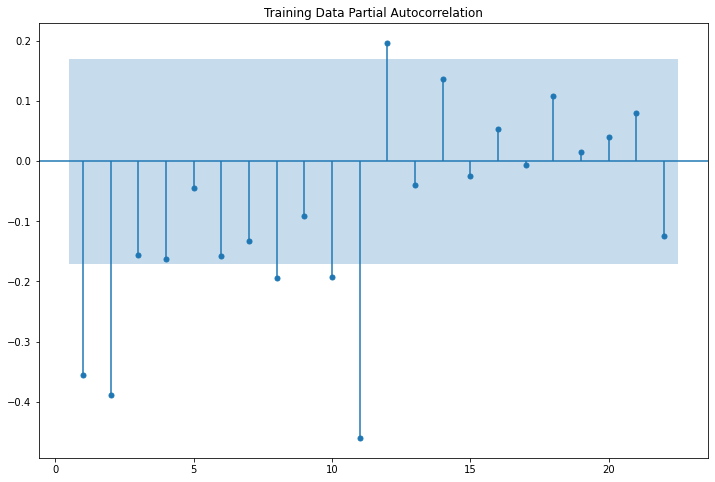

In [188]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

In [189]:
manual_ARIMA = ARIMA(train['Rose'], order=(4,1,4))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmod

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  133
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -637.472
Date:                Tue, 15 Mar 2022   AIC                           1292.945
Time:                        06:46:02   BIC                           1318.890
Sample:                    01-01-1980   HQIC                          1303.488
                         - 01-01-1991                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3008      0.794     -0.379      0.705      -1.857       1.255
ar.L2         -0.9497      0.293     -3.237      0.001      -1.525      -0.375
ar.L3         -0.3157      0.770     -0.410      0.6

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


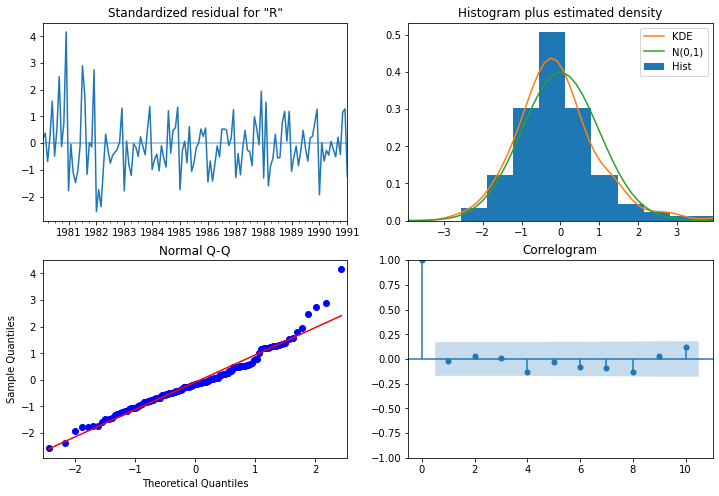

In [190]:
results_manual_ARIMA.plot_diagnostics();

In [191]:
#predict Test

In [192]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [193]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 32.784419774278284 
MAPE: 66.37723617768862


In [194]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.287933,68.284866
"ARIMA(3,1,3)",32.784420,66.377236


In [195]:
#SARIMA

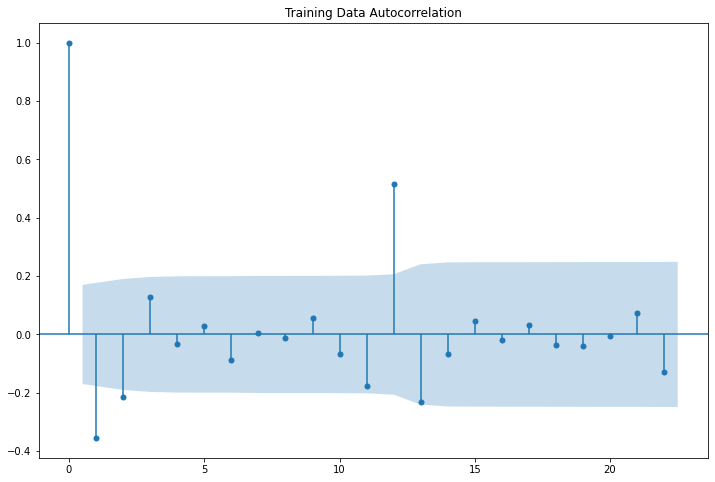

In [196]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');

In [197]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [198]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [199]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1337.085435720141
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1277.6945717432886
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1154.5911456337112
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1090.925920637625
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1287.8974782659836
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1254.6080807719281
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1156.2438260801996
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1069.1182105883768
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1147.4621876207589
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1147.2539239335906
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1126.582543367035
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1068.6442934893228
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC:1081.834643883246
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1070.9026533546603
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1067.81460751465
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1068.1777441182358
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1273.386393114138
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1211.3774501259313
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 0, 6) - AIC:1217.4501662008026
SARIMA(1, 1, 3)x(1, 0, 1, 6) - AIC:1149.9048246521434
SARIMA(1, 1, 3)x(1, 0, 2, 6) - AIC:1063.0530223658893
SARIMA(1, 1, 3)x(1, 0, 3, 6) - AIC:998.3226444556107
SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC:1089.261472906221
SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC:1092.9138033288677
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC:1043.6326458020526
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC:961.598215111373
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC:1036.3857034289895
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC:1028.0613891876615
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC:1015.7045556434392
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC:963.5751260563757
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1291.2343250584795
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1243.0296693073556
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1138.1434206752056
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1067.551728058781
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1230.058996163471
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1195.80111700947
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:11

In [200]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
187,"(2, 1, 3)","(2, 0, 3, 6)",959.742455
59,"(0, 1, 3)","(2, 0, 3, 6)",959.951249
251,"(3, 1, 3)","(2, 0, 3, 6)",960.677555
191,"(2, 1, 3)","(3, 0, 3, 6)",961.243770
123,"(1, 1, 3)","(2, 0, 3, 6)",961.598215


In [201]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1, 1, 3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  133
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -470.788
Date:                           Tue, 15 Mar 2022   AIC                            963.575
Time:                                   06:53:34   BIC                            993.280
Sample:                               01-01-1980   HQIC                           975.624
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2084      0.492     -0.423      0.672      -1.174       0.757
ma.L1         -0.5593    286.036     -0.002

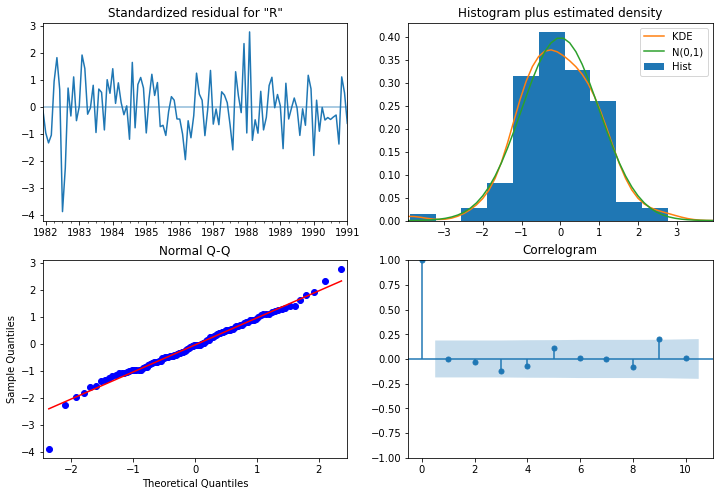

In [202]:
results_auto_SARIMA.plot_diagnostics();

In [203]:
#TEST

In [204]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [205]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1991-02-01,67.847112,16.991763,34.543869,101.150356
1991-03-01,78.618325,17.477032,44.363971,112.872678
1991-04-01,76.505744,17.474446,42.256460,110.755028
1991-05-01,77.981174,17.475473,43.729876,112.232473
1991-06-01,80.424499,17.475280,46.173579,114.675420


In [206]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 30.899906909101823 
MAPE: 61.34459299932584


In [207]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.287933,68.284866
"ARIMA(3,1,3)",32.784420,66.377236
"SARIMA(1,1,3)(3,0,3,6)",30.899907,61.344593


In [208]:
# sarima AcF & PACF

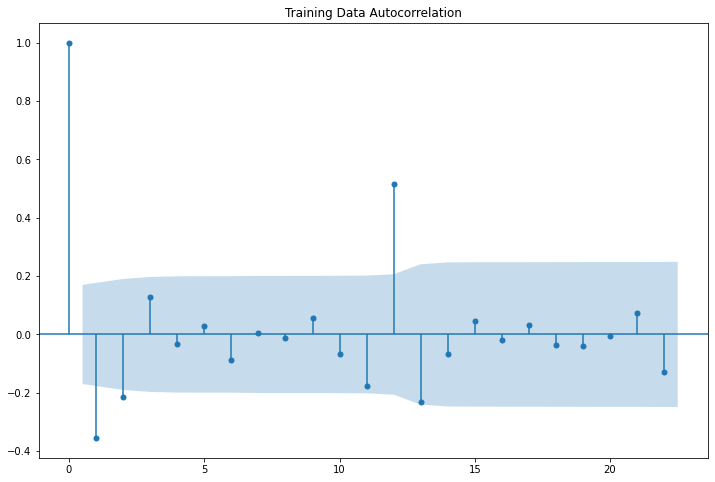

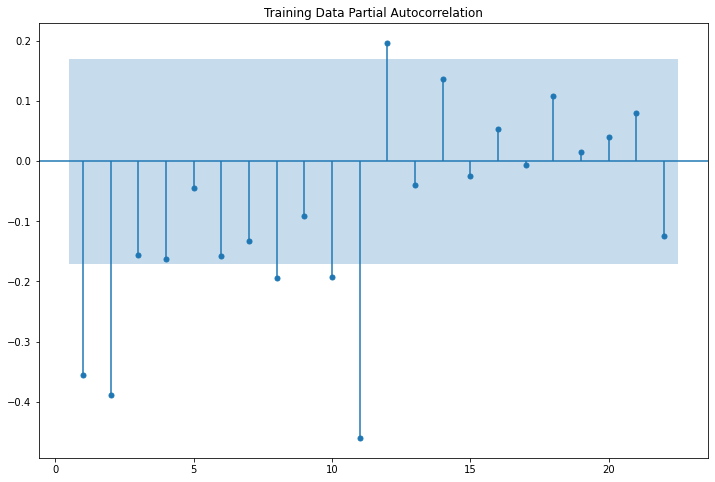

In [209]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

In [210]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  133
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -491.160
Date:                           Tue, 15 Mar 2022   AIC                           1002.319
Time:                                   06:53:43   BIC                           1029.324
Sample:                               01-01-1980   HQIC                          1013.273
                                    - 01-01-1991                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0948      0.110      0.861      0.390      -0.121       0.311
ar.L2          0.6220      0.115      5.399

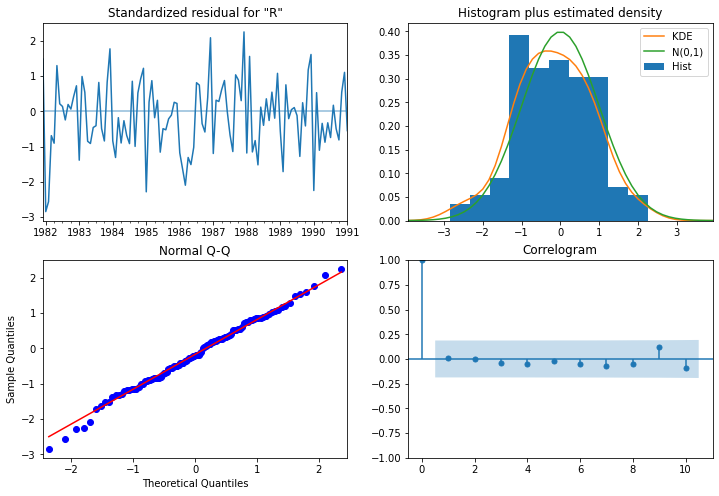

In [211]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [212]:
#Test

In [213]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [214]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 28.46669453443128 
MAPE: 57.75571616094538


In [215]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.287933,68.284866
"ARIMA(3,1,3)",32.784420,66.377236
"SARIMA(1,1,3)(3,0,3,6)",30.899907,61.344593
"SARIMA(3,1,3)(0,0,3,6)",28.466695,57.755716


In [216]:
#most optimum

In [217]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  185
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -678.788
Date:                           Tue, 15 Mar 2022   AIC                           1379.576
Time:                                   06:53:51   BIC                           1413.539
Sample:                                        0   HQIC                          1393.365
                                           - 185                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1136      0.414     -0.274      0.784      -0.926       0.699
ma.L1         -0.6313      0.408     -1.545

In [218]:
#prdict 20 month

In [219]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

C:\Users\Arivudaiambi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [220]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
185,47.183157,15.667069,16.476265,77.890049
186,46.984198,16.169003,15.293535,78.674861
187,49.581270,16.169007,17.890600,81.271941
188,53.026455,16.234913,21.206610,84.846299
189,63.459263,16.286073,31.539146,95.379380


In [221]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 29.03241157741183


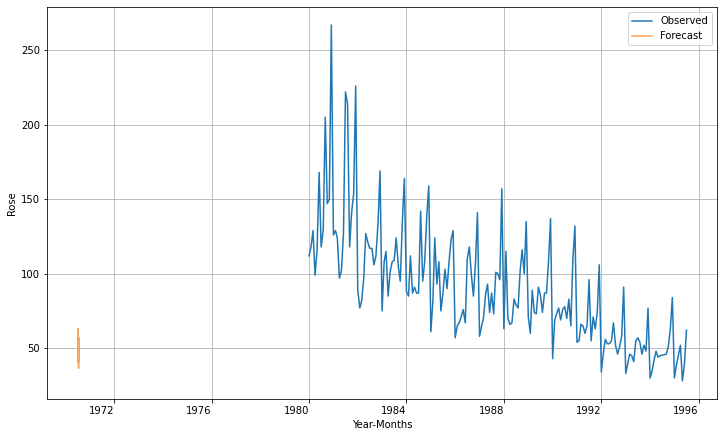

In [222]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

In [223]:
resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",33.287933,68.284866
"ARIMA(3,1,3)",32.784420,66.377236
"SARIMA(1,1,3)(3,0,3,6)",30.899907,61.344593
"SARIMA(3,1,3)(0,0,3,6)",28.466695,57.755716
